In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/ten_intensities.csv')

Now lets load in the data and take a look

In [34]:
# Take a look at the first few rows of the data
print(data.head())

# Get the shape of the data
print(data.shape)

# Get the column names
print(data.columns)

# Get the data types of each column
print(data.dtypes)

# Calculate summary statistics for the data
print(data.describe())

   Intensity  Trial  SpikeTime
0          0      1         14
1          0      1         18
2          0      3         14
3          0      3         20
4          0      4         14
(231, 3)
Index(['Intensity', 'Trial', 'SpikeTime'], dtype='object')
Intensity    int64
Trial        int64
SpikeTime    int64
dtype: object
        Intensity       Trial   SpikeTime
count  231.000000  231.000000  231.000000
mean     6.285714    4.441558   12.969697
std      2.313611    2.910970    4.501588
min      0.000000    0.000000    0.000000
25%      5.000000    2.000000   10.000000
50%      7.000000    4.000000   13.000000
75%      8.000000    7.000000   17.000000
max      9.000000    9.000000   20.000000


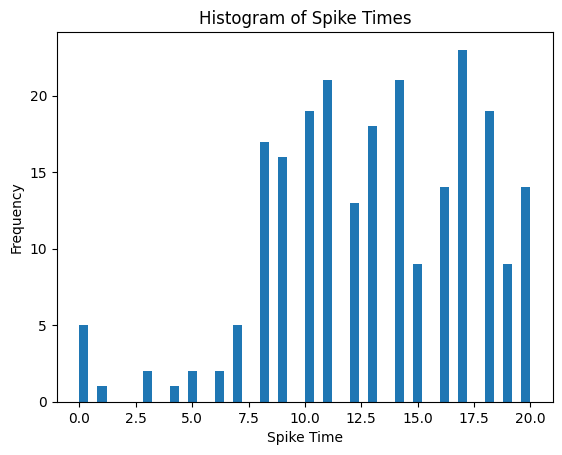

In [35]:
# Plot a histogram of the SpikeTime column
plt.hist(data['SpikeTime'], bins=50)
plt.xlabel('Spike Time')
plt.ylabel('Frequency')
plt.title('Histogram of Spike Times')
plt.show()


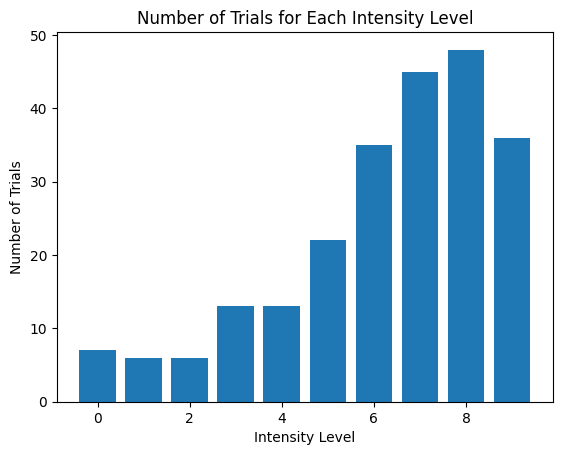

In [36]:
# Plot a bar chart of the number of trials for each intensity level
intensity_counts = data['Intensity'].value_counts()
plt.bar(intensity_counts.index, intensity_counts.values)
plt.xlabel('Intensity Level')
plt.ylabel('Number of Trials')
plt.title('Number of Trials for Each Intensity Level')
plt.show()

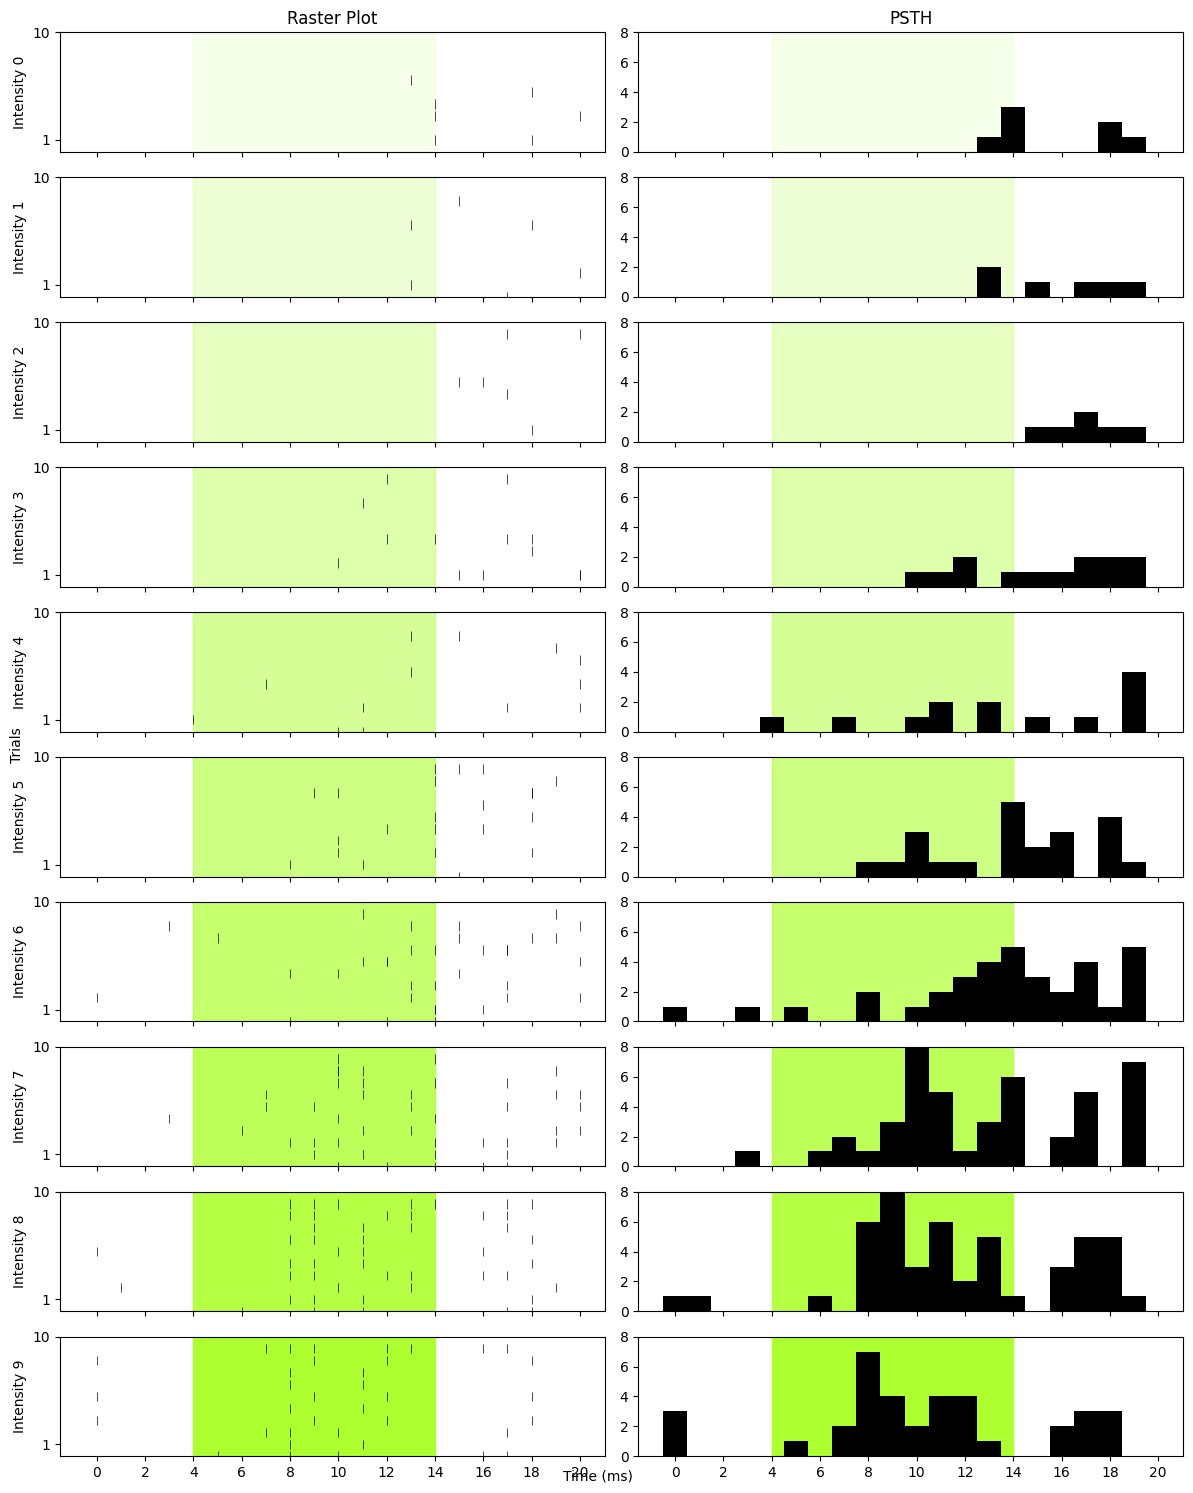

In [37]:
# Define constants
stim_on = 4
stim_off = 14
num_tp = 21
trials = sorted(data['Trial'].unique())

# Create a list of intensity levels and sort them
int_levels = sorted(data['Intensity'].unique())

# Set the number of subplot rows based on number of intensity levels in data
# Also specify the figure dimensions since it will need to be a big figure
fig, axs = plt.subplots(len(int_levels), 2, figsize=[12, 15], sharex=True)

# Initialize y_max to scale the PSTHs
y_max = 0

for i, intensity in enumerate(int_levels):
    
    ## Raster plot
    # select just data for current intensity level
    dat = data[data['Intensity'] == intensity]

    # Draw the raster one trial at a time
    for trial in trials:
        # get spike times for this trial
        spike_times = dat[dat['Trial'] == trial]['SpikeTime']
        # Draw the raster
        axs[i, 0].vlines(spike_times, 
                         trial - 0.4, trial + 0.4, 
                         color='black', linewidth=0.5)

    # Shade time when stimulus was on
    axs[i, 0].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')

    # Set y-axis limits and ticks for raster plot
    axs[i, 0].set_ylim(0, len(trials))
    axs[i, 0].set_yticks([1, len(trials)])
    axs[i, 0].set_ylabel(f'Intensity {intensity}')

    ## PSTH
    # Shade time when stimulus was on
    axs[i, 1].axvspan(stim_on, stim_off, 
                      alpha= intensity / 10 + 0.1, 
                      color='greenyellow')
    
    # Plot histogram
    hist, bins = np.histogram(dat['SpikeTime'], bins=range(0, num_tp, 1))
    axs[i, 1].bar(bins[:-1], hist, width=1, color='black')

    # Update y_max
    y_max = max(y_max, np.max(hist))

    # Set x-axis ticks for PSTH
    axs[i, 1].set_xticks(range(0, num_tp, 2))
    axs[i, 1].set_xlabel('')

# Set y-axis limits for all PSTHs
for i in range(len(int_levels)):
    axs[i, 1].set_ylim(0, y_max)

# Set titles and labels
axs[0, 0].set_title('Raster Plot')
axs[0, 1].set_title('PSTH')
fig.text(0.5, 0.01, 'Time (ms)', ha='center')
fig.text(0.01, 0.5, 'Trials', va='center', rotation='vertical')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

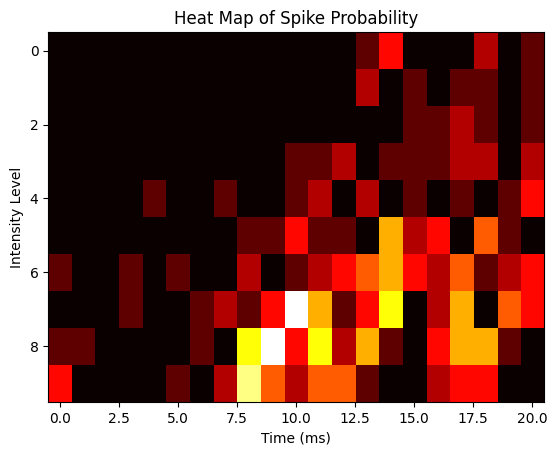

In [38]:
# Define experimental parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities

# Initialize 2D array to store histograms
histograms = np.zeros((num_intensities, num_tp))

# Loop through each intensity level and compute histogram
for i, intensity in enumerate(sorted(data['Intensity'].unique())):
    hist, _ = np.histogram(data[data['Intensity'] == intensity]['SpikeTime'],
                           bins=num_tp,
                           range=(0, num_tp))
    histograms[i, :] = hist

# Create heat map
plt.imshow(histograms, cmap='hot', interpolation='nearest', aspect='auto')
plt.xlabel('Time (ms)')
plt.ylabel('Intensity Level')
plt.title('Heat Map of Spike Probability')
plt.show()

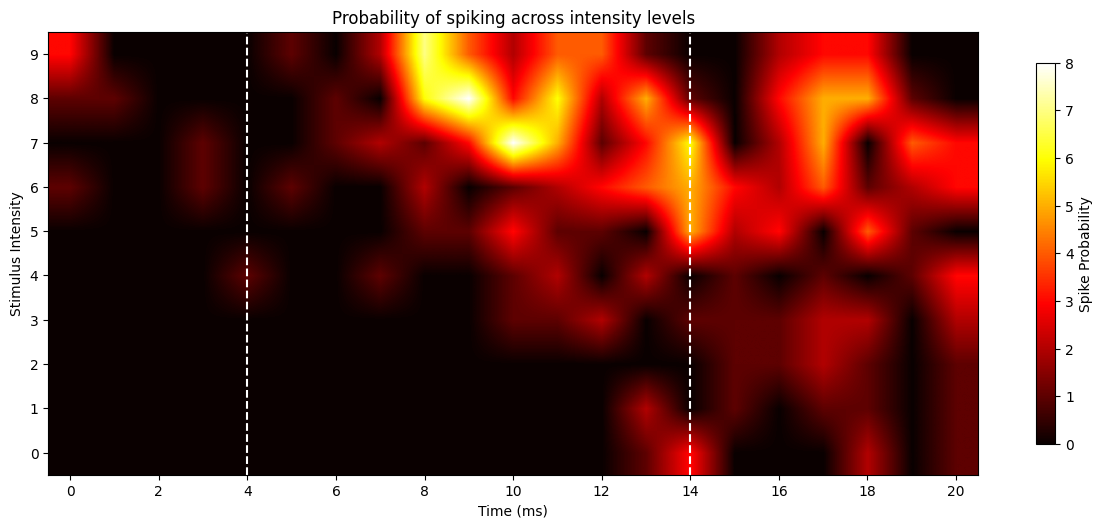

In [39]:
# Define experimental parameters
stim_on = 4   # time stimulus turned on
stim_off = 14 # time stimulus turned off
num_trials = 10 # number of trials per intensity level
num_tp = 21     # Number of time points in each trial (0-20 ms, inclusive)
num_intensities = 10 # number of stimulus intensities

# Initialize 2D array to store histograms
histograms = np.zeros((num_intensities, num_tp))

# Loop through each intensity level and compute histogram
for i, intensity in enumerate(sorted(data['Intensity'].unique())):
    hist, _ = np.histogram(data[data['Intensity'] == intensity]['SpikeTime'],
                           bins=num_tp,
                           range=(0, num_tp))
    histograms[i, :] = hist

# Create heat map
fig, ax = plt.subplots(figsize=[15, 15])
im = ax.imshow(histograms, 
               origin='lower', 
               cmap='hot', 
               interpolation='bilinear')

# Show stimulus on and off times
ax.axvline(stim_on, color='white', linestyle='--')
ax.axvline(stim_off, color='white', linestyle='--')

# Set tick mark range and spacing
ax.set_xticks(range(0, num_tp + 1, 2))
ax.set_xlabel('Time (ms)')

ax.set_yticks(range(num_intensities))
ax.set_ylabel('Stimulus Intensity')

ax.set_title('Probability of spiking across intensity levels')

# Create a colorbar using the im pointer
cb = fig.colorbar(im, shrink=0.33)
cb.ax.set_ylabel('Spike Probability')

plt.show()

In [40]:
# times the stimulus went on and off
trial_start_time = -0.150
grating_on_time  = 0.0
grating_off_time = 2.0
trial_end_time   = 2.5

In [41]:
#load the MEA dataset
df = pd.read_csv('data/multielectrode_data.csv')
print(df.shape)
df.head()

(623406, 4)


,channel,time,orientation,trial
0,42.0,2.425,90.0,0.0
1,42.0,2.452,90.0,0.0
2,42.0,2.483,90.0,0.0
3,42.0,2.515,90.0,0.0
4,42.0,2.545,90.0,0.0


The columns are:
channel — which electrode the data came from
time — spike time, relative to stimulus onset (so we have negative values for spikes that occurred during the fixation period prior to stimulus onset). This is measured in seconds
orientation — of stimulus (0 or 90 deg)
trial number — 1150 trials for each orientation

In [42]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of electrodes:", len(df['channel'].unique()))
print("Number of orientations:", len(df['orientation'].unique()))
print("Number of trials:", len(df['trial'].unique()))

Number of rows: 623406
Number of columns: 4
Number of electrodes: 20
Number of orientations: 2
Number of trials: 2300


Electrodes

In [43]:
# Create a heatmap of electrode activity
electrode_activity = df.groupby('channel')['time'].count().reset_index()
electrode_activity.columns = ['Electrode', 'Activity']

# Use a log scale to reduce skewness
electrode_activity['Activity'] = np.log(electrode_activity['Activity'] + 1)

# Create a pivot table to reshape the data
electrode_pivot = electrode_activity.pivot_table(index='Electrode', values='Activity', aggfunc='sum')

# Use seaborn's clustermap to create a heatmap with clustering
plt.figure(figsize=(12, 10))
sns.clustermap(electrode_pivot, cmap='Blues', annot=True, fmt='.2f', 
               row_cluster=True, col_cluster=False, linewidths=0.5, linecolor='white')
plt.title('Electrode Activity Heatmap')
plt.xlabel('')
plt.ylabel('Electrode')
plt.show()

RuntimeError: clustermap requires scipy to be available

<Figure size 1200x1000 with 0 Axes>